<a href="https://colab.research.google.com/github/Goodwill-Khoa/219080534/blob/main/INDABAX2022g3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# Possible imports PLeasee check with functions as well
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 25 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=33364135194e771fcb195886b38885b54d7862795c9edbbeec525159ae52cd1f
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
pip install FER

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 812 kB 7.8 MB/s 
     |████████████████████████████████| 2.3 MB 44.6 MB/s 


In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imutils
import numpy as np
import cv2
#import face_recognition
import os
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import matplotlib.pyplot as plt 
%matplotlib inline
from fer import FER

In [ ]:
from google.colab import files
files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from zipfile import ZipFile
file_path = "TrainingKnonw.zip"

with ZipFile(file_path, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
#Known = Storage and application sheet. This will be the Photos and Names of the user
# We ill just load an existing known folders. Seach folder will contains photos ad a names 

#this will just be photos with names and no names 

#We can load the Image from a source

def loadImage(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename			# this is a path to the image


In [ ]:
image2path = loadImage()  # we will save this path so we can use it again

In [ ]:
# now we will do the testing
# we opted to use a function that we can call at any moment

def IdentifyFace(path):
	import face_recognition
	import cv2
	import os
	from google.colab.patches import cv2_imshow
        
	def read_img(path):
		img = cv2.imread(path)
		(h, w) = img.shape[:2]
		width = 500
		ratio = width / float(w)
		height = int(h * ratio)
		return cv2.resize(img, (width, height))


	known_encodings = []
	known_names = []
	known_dir = 'Training knonw'

	for file in os.listdir(known_dir):
		img = read_img(known_dir + '/' + file)
		img_enc = face_recognition.face_encodings(img)[0]
		known_encodings.append(img_enc)
		known_names.append(file.split('.')[0])

	unknown_dir = 'unknown'
	for file in os.listdir(unknown_dir):
		print("Processing", file)
		img = read_img(unknown_dir + '/' + file)
		img_enc = face_recognition.face_encodings(img)[0]

		results = face_recognition.compare_faces(known_encodings, img_enc)
		# print(face_recognition.face_distance(known_encodings, img_enc))

		for i in range(len(results)):
			if results[i]:
				name = known_names[i]
				(top, right, bottom, left) = face_recognition.face_locations(img)[0]
				cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
				cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
				cv2_imshow(img)
            
			#print(results)
	return(results) # we just want to collect the name

In [ ]:
def EmotionDetect(image2path):
  test_image_one = plt.imread(image2path)
  emo_detector = FER(mtcnn=True)
  # Capture all the emotions on the image
  captured_emotions = emo_detector.detect_emotions(test_image_one)
  # Print all captured emotions with the image
  print(captured_emotions)
  plt.imshow(test_image_one)
  
  # Use the top Emotion() function to call for the dominant emotion in the image
  dominant_emotion, emotion_score = emo_detector.top_emotion(test_image_one)
  print(dominant_emotion, emotion_score)

  return dominant_emotion

[{'box': [253, 135, 157, 198], 'emotions': {'angry': 0.28, 'disgust': 0.0, 'fear': 0.07, 'happy': 0.04, 'sad': 0.05, 'surprise': 0.11, 'neutral': 0.46}}]
neutral 0.46


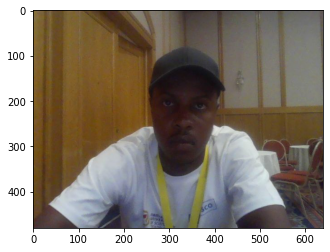

In [ ]:
EmotionT = EmotionDetect(image2path)

In [ ]:
print("YOU ARE FEELING ", EmotionT, "Today ")

YOU ARE FEELING  neutral Today 


In [ ]:
IdentifyFace(image2path)

In [ ]:
print(Person1Name)